# 3a


In [45]:
from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, rescale_intensity
from scipy import signal
from sklearn.metrics import mean_squared_error
import numpy as np
import skimage.io as io
from skimage.util import *
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.exposure import equalize_adapthist, rescale_intensity
from scipy import signal
from sklearn.metrics import mean_squared_error

In [46]:
def GaussFilter( w ,sigma, mew ):

 x, y = np.meshgrid(np.linspace(-1,1,w), np.linspace(-1,1,w))
 dst = np.sqrt(y*y+x*x)
 sigma = 1
 mew=mew
 gauss = np.exp(-( (dst-mew)*(dst-mew) / ( 2.0 * (sigma*sigma) ) ) )

 res= gauss/(np.sum(gauss))
 return res


def GLPF_MSE(noise_img , filter_length ,std_deviation,sig ):
 error =[]
 k=0
 fl = 3
 sig = sig
 filtered_img =[]
 for i in filter_length:
    for j in std_deviation:
            gauss = GaussFilter(i,j,0)
            conv = signal.convolve2d(noise_img, gauss ,mode='same',boundary='fill',fillvalue=0)
            filtered_img.append(conv)
            mse = mean_squared_error(conv , image)
            error.append(mse)
            print ("MSE for filter length =" ,i , " & sigma = " ,j,"is", mse)
            if(k>0):
              if(mse < error[k-1] ):
                fl = i
                sig = j
            k=k+1
 return     fl , sig

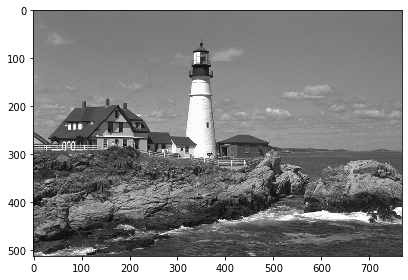

In [65]:
image = io.imread("lighthouse2.bmp")
image = rgb2gray(image)
image = rescale_intensity(image,out_range=(0,255)).astype(np.ubyte)
io.imshow(image ,cmap='gray')
plt.show()


In [66]:
gauss = GaussFilter(5,1,0)
mux = signal.convolve2d(image, gauss ,mode='same',boundary='fill',fillvalue=0)
hpf = np.array([[ -1 ,-1, -1] ,[-1, 8, -1], [-1 ,-1 ,-1 ]])
muxhpf = signal.convolve2d(mux, hpf ,mode='same',boundary='fill',fillvalue=0)
ls = []
error = []
g = np.arange(0.1,10,0.1)
for gain in g:
    sharp = gain*muxhpf +mux
    mse = mean_squared_error(sharp , image)
    ls = [gain , mse]
    error.append(ls)

error = np.array(error)
index = error[:,-1].argmin()

print("Gain is ", error[index][0] , "& Mean Squared Error is ", error[index][1] )


Gain is  0.30000000000000004 & Mean Squared Error is  174.31911997503846


# 3b

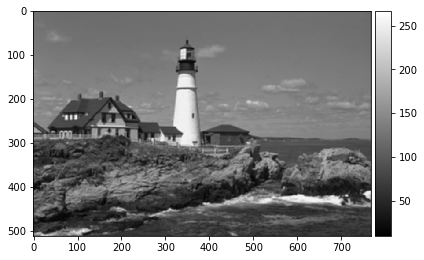

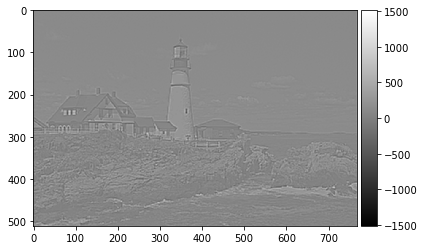

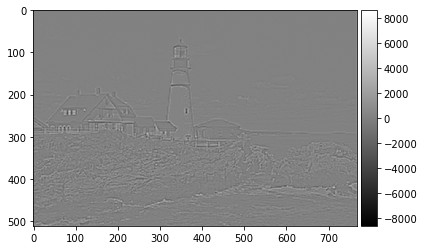

In [57]:

gauss = GaussFilter(5,1,0)
mux = signal.convolve2d(image, gauss ,mode='same',boundary='fill',fillvalue=0)
hpf = np.array([[ -1 ,-1, -1] ,[-1, 8, -1], [-1 ,-1 ,-1 ]])
muxhpf = signal.convolve2d(mux, hpf ,mode='same',boundary='fill',fillvalue=0)

gain = 0.1
sharpness1 = gain*muxhpf +mux
io.imshow(sharpness1,cmap='gray')
plt.show()

gain = 4
sharpness2 = gain*muxhpf +mux
io.imshow(sharpness2,cmap='gray')
plt.show()

gain = 25
sharpness3 = gain*muxhpf +mux
io.imshow(sharpness3,cmap='gray')
plt.show()


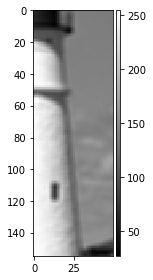

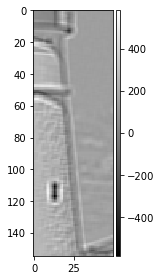

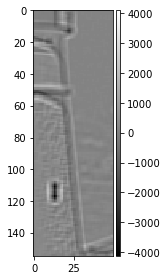

In [64]:

zoomed = sharpness1[125:280,350:400]
io.imshow(zoomed,cmap='gray')
plt.show()

zoomed = sharpness2[125:280,350:400]
io.imshow(zoomed,cmap='gray')
plt.show()

zoomed = sharpness3[125:280,350:400]
io.imshow(zoomed,cmap='gray')
plt.show()


C:\Users\LEGION\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


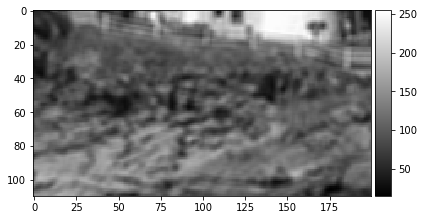

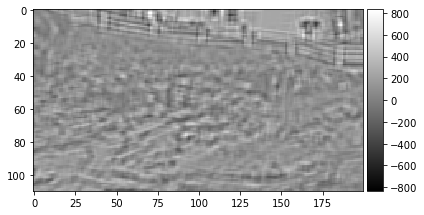

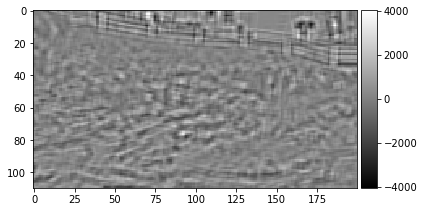

In [63]:

zoomed = sharpness1[290:400,200:400]
io.imshow(zoomed,cmap='gray')
plt.show()

zoomed = sharpness2[290:400,200:400]
io.imshow(zoomed,cmap='gray')
plt.show()

zoomed = sharpness3[290:400,200:400]
io.imshow(zoomed,cmap='gray')
plt.show()